In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Disable axis for all plots

In [ ]:
# rc = {"axes.spines.left" : False,
#       "axes.spines.right" : False,
#       "axes.spines.bottom" : False,
#       "axes.spines.top" : False,
#       "xtick.bottom" : False,
#       "xtick.labelbottom" : False,
#       "ytick.labelleft" : False,
#       "ytick.left" : False}
# plt.rcParams.update(rc)

# Remove ticks

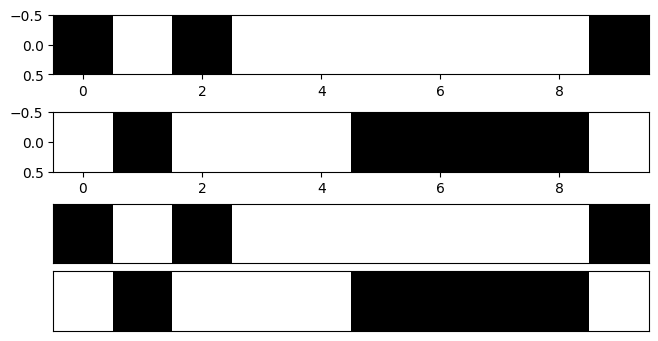

In [4]:

np.random.seed(68)
rows = np.random.randint(0,2,(2,10))
fig, ax = plt.subplots(4,1, figsize = (10,3.3), layout='constrained')

for i in range(2):
    ax[i].imshow(rows[[i]], 'gray_r')

for i in range(2):
    ax[i+2].imshow(rows[[i]], 'gray_r')
    ax[i+2].set_xticks([])
    ax[i+2].set_yticks([])


# Canvas and plot colors

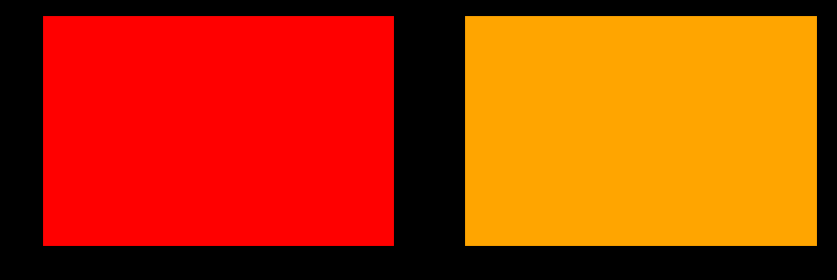

In [6]:
fig,ax = plt.subplots(1,2, figsize = (10,3), facecolor = 'black')
ax[0].set_facecolor('Red')
ax[1].set_facecolor('Orange')